# Preparing the plot: Reading the map file

In [1]:
url = 'https://github.com/DACSS690C-CSSMETHODS/HW1/raw/refs/heads/main/maps/countriesCIA%202.gpkg'

import geopandas as gpd

# read the data
countriesCIA = gpd.read_file(url, layer='cia')
worldBorders = gpd.read_file(url, layer='border')

# see some rows
countriesCIA.head()

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,geometry
0,Afghanistan,Afghanistan,South Asia,0,23.3,0.01,2,3.average,3.(15-30],0,1.very low,1.very low,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
1,Algeria,Algeria,Africa,2,21.0,0.59,2,3.average,3.(15-30],0,1.very low,3.average,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
2,Azerbaijan,Azerbaijan,Middle East,1,24.0,1.38,2,3.average,3.(15-30],0,1.very low,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
3,Albania,Albania,Europe,1,22.4,4.40,2,3.average,3.(15-30],2,3.average,2.low,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
4,Armenia,Armenia,Middle East,1,25.5,3.77,2,3.average,3.(15-30],1,2.low,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."


In [2]:
#seeing the layers in the file
gpd.list_layers(url)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


# Creating the non-interactive plot

In [4]:
#now we can see what countries are doing the best in all three variables 
healthycountries = countriesCIA[(countriesCIA.obesity_levels == '1.very low') & (countriesCIA.tobacco_levels == '1.very low') & (countriesCIA.alcohol_levels == '1.very low')]
healthycountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,geometry
17,Benin,Benin,Africa,0,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651..."
26,Chad,Chad,Africa,0,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9..."
42,Eritrea,Eritrea,Africa,0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13..."
44,Ethiopia,Ethiopia,Africa,0,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36..."
49,Ghana,Ghana,Africa,0,3.5,1.59,0,1.very low,1. below5,0,1.very low,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023..."
83,Mali,Mali,Africa,0,8.3,0.60,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-9.86522 12.05481, -9.91195 12..."
86,Mauritania,Mauritania,Africa,0,10.7,0.00,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-6.33596 22.99026, -6.32583 22..."
94,Niger,Niger,Africa,0,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((7.02806 12.99577, 6.94222 12.9..."
118,Senegal,Senegal,Africa,0,6.9,0.25,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-14.34175 12.67889, -14.39306 ..."
128,Togo,Togo,Africa,0,6.8,1.40,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((1.65542 7.52977, 1.65014 7.513..."


<Axes: >

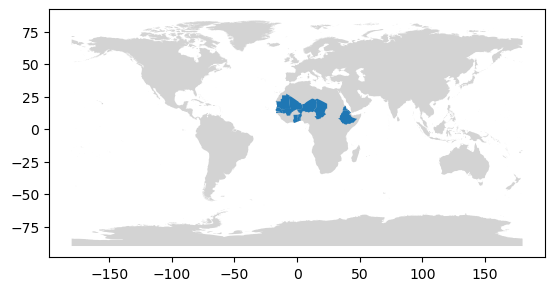

In [5]:
#these are the countries:
base=worldBorders.plot(color='lightgrey')
healthycountries.plot(ax=base)

<Axes: >

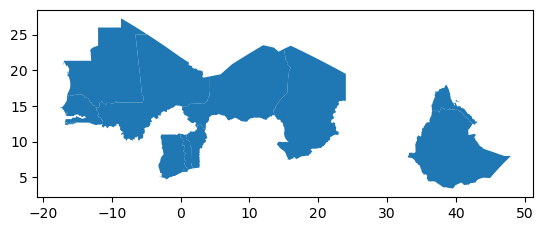

In [7]:
#we need to alter the basemap for an area like this:
countriesCIA[(countriesCIA.obesity_levels == '1.very low') & (countriesCIA.tobacco_levels == '1.very low') & (countriesCIA.alcohol_levels == '1.very low')].plot()

<Axes: >

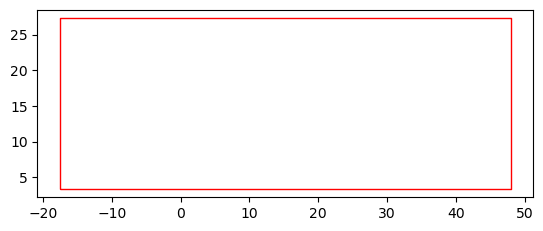

In [8]:
#finding the rectangle with our polygons
maskToClip=healthycountries.dissolve().envelope
maskToClip.plot(color='white',edgecolor='red')

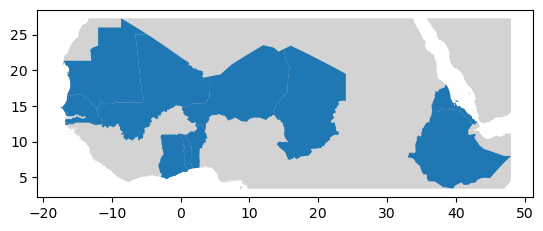

In [9]:
#new map
import matplotlib.pyplot as plt

miniWorld=worldBorders.clip(maskToClip)

base=miniWorld.plot(color='lightgrey')

healthycountries.plot(ax=base)
plt.show()

In [10]:
#getting the coordinates for the country names
allCoords=[x.coords[:][0] for x in healthycountries.representative_point()]
allCoords

[(2.295148254642566, 9.310901641845703),
 (18.55982626888577, 15.439477920532227),
 (38.0874970729557, 15.17777681350708),
 (38.99488193529696, 9.13499927520752),
 (-1.0788641062852107, 7.919823169708252),
 (-0.7343858289118264, 17.56208038330078),
 (-11.471204741016852, 21.010009765625),
 (9.8919770923853, 17.56208038330078),
 (-14.659253915593727, 14.4959716796875),
 (1.0334488223151097, 8.643054485321045)]

In [11]:
#using those coordinates to create a new column:
healthycountries=healthycountries.assign(coordinates=allCoords)
healthycountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,geometry,coordinates
17,Benin,Benin,Africa,0,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651...","(2.295148254642566, 9.310901641845703)"
26,Chad,Chad,Africa,0,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9...","(18.55982626888577, 15.439477920532227)"
42,Eritrea,Eritrea,Africa,0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...","(38.0874970729557, 15.17777681350708)"
44,Ethiopia,Ethiopia,Africa,0,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36...","(38.99488193529696, 9.13499927520752)"
49,Ghana,Ghana,Africa,0,3.5,1.59,0,1.very low,1. below5,0,1.very low,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023...","(-1.0788641062852107, 7.919823169708252)"
83,Mali,Mali,Africa,0,8.3,0.60,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-9.86522 12.05481, -9.91195 12...","(-0.7343858289118264, 17.56208038330078)"
86,Mauritania,Mauritania,Africa,0,10.7,0.00,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-6.33596 22.99026, -6.32583 22...","(-11.471204741016852, 21.010009765625)"
94,Niger,Niger,Africa,0,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((7.02806 12.99577, 6.94222 12.9...","(9.8919770923853, 17.56208038330078)"
118,Senegal,Senegal,Africa,0,6.9,0.25,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((-14.34175 12.67889, -14.39306 ...","(-14.659253915593727, 14.4959716796875)"
128,Togo,Togo,Africa,0,6.8,1.40,0,1.very low,2.(5-15],0,1.very low,1.very low,"MULTIPOLYGON (((1.65542 7.52977, 1.65014 7.513...","(1.0334488223151097, 8.643054485321045)"


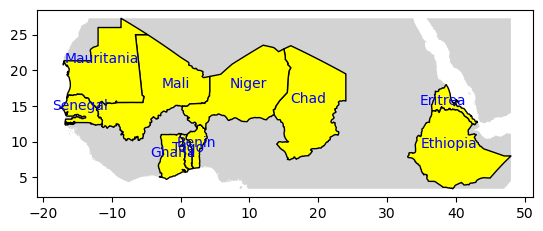

In [12]:
#now i can use that info to plot:
base=miniWorld.plot(color='lightgrey')
healthycountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in healthycountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')